In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd
from prophet import Prophet

In [2]:
# Load the data for Counties adoption rate analysis
df = pd.read_csv(
    Path("../../../../../data/processed_data/final_states_registrations.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (305, 20)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.000179,0.841172,0.591998,-0.012008
1,2017,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.000629,0.796730,1.062883,-0.006019
2,2017,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.001232,0.845013,0.478094,-0.007985
3,2017,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.000115,0.806165,0.481551,-0.012488
4,2017,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.005928,0.880370,0.286051,-0.007949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.007406,0.869303,0.836773,-0.006377
301,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,0.015303,0.830680,0.578543,-0.011775
302,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.001276,0.851300,0.895916,-0.002779
303,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.002867,0.835872,0.701644,-0.005426


In [3]:
# Convert `ev_adoption_rate` and `gas_adoption_rate` to percentage
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["gas_adoption_rate"] = df["gas_adoption_rate"] * 100

# Convert the growth rate columns to percentages from decimals
df["ev_growth_rate"] = df["ev_growth_rate"] * 100
df["gas_growth_rate"] = df["gas_growth_rate"] * 100

In [4]:
# List of states to plot
states_list = df["state"].unique().tolist()

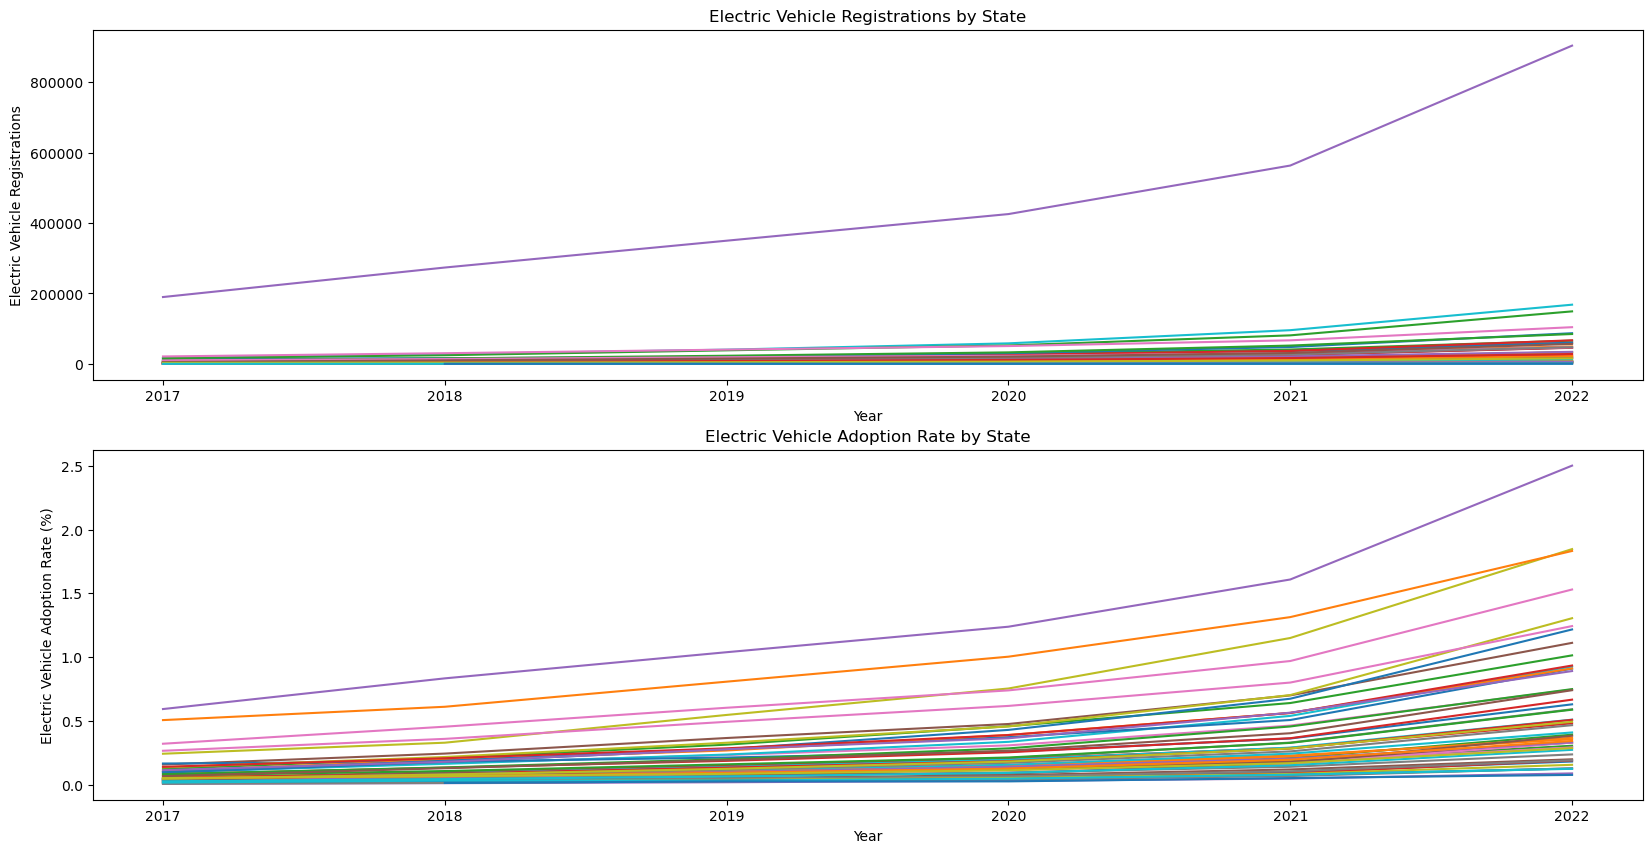

In [5]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
for state in states_list:
    sns.lineplot(data=df[df["state"] == state], x="year", y="electric", label=state)
plt.title("Electric Vehicle Registrations by State")
plt.xlabel("Year")
plt.ylabel("Electric Vehicle Registrations")
plt.legend().remove()

plt.subplot(2, 1, 2)
for state in states_list:
    sns.lineplot(data=df[df["state"] == state], x="year", y="ev_adoption_rate", label=state)
plt.title("Electric Vehicle Adoption Rate by State")
plt.xlabel("Year")
plt.ylabel("Electric Vehicle Adoption Rate (%)")
plt.legend().remove()


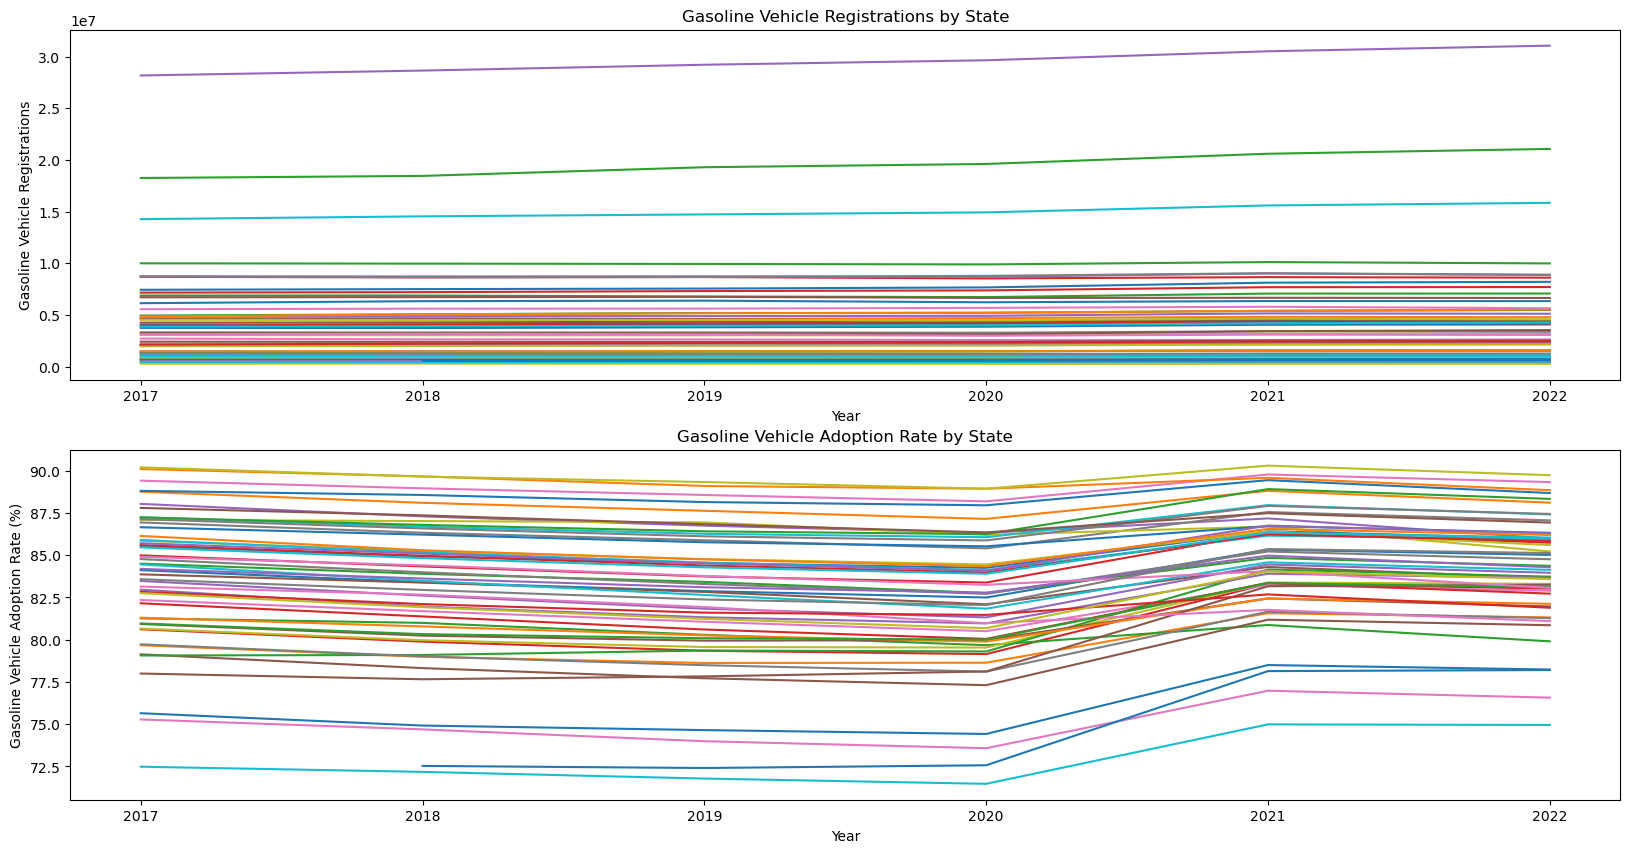

In [6]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
for state in states_list:
    sns.lineplot(data=df[df["state"] == state], x="year", y="gasoline", label=state)
plt.title("Gasoline Vehicle Registrations by State")
plt.xlabel("Year")
plt.ylabel("Gasoline Vehicle Registrations")
plt.legend().remove()

plt.subplot(2, 1, 2)
for state in states_list:
    sns.lineplot(data=df[df["state"] == state], x="year", y="gas_adoption_rate", label=state)
plt.title("Gasoline Vehicle Adoption Rate by State")
plt.xlabel("Year")
plt.ylabel("Gasoline Vehicle Adoption Rate (%)")
plt.legend().remove()



In [7]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

df

,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017-01-01,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.017942,84.117159,59.199803,-1.200808
1,2017-01-01,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.062883,79.673007,106.288319,-0.601901
2,2017-01-01,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.123155,84.501309,47.809362,-0.798453
3,2017-01-01,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.011531,80.616520,48.155052,-1.248798
4,2017-01-01,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.592820,88.037038,28.605053,-0.794885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022-01-01,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.740634,86.930294,83.677261,-0.637669
301,2022-01-01,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,1.530320,83.067990,57.854313,-1.177489
302,2022-01-01,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.127611,85.129962,89.591645,-0.277865
303,2022-01-01,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.286695,83.587159,70.164363,-0.542614


In [8]:
# List of states to plot
states_list = df["state"].unique().tolist()

In [9]:
# Do a prophet model forcasting all the states separately

# Create a list of dataframes for each state
df_list = []
for state in states_list:
    df_list.append(df[df["state"] == state].rename(columns={"year": "ds", "ev_adoption_rate": "y"}))

print("Number of states:", len(df_list))

Number of states: 51


In [10]:
# Create a list of models for each state

models = []
for df in df_list:
    model = Prophet()
    model.fit(df)
    models.append(model)



17:45:03 - cmdstanpy - INFO - Chain [1] start processing
17:45:03 - cmdstanpy - INFO - Chain [1] done processing
17:45:03 - cmdstanpy - INFO - Chain [1] start processing
17:45:03 - cmdstanpy - INFO - Chain [1] done processing
17:45:03 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:04 - cmdstanpy - INFO - Chain [1] start processing
17:45:04 - cmdstanpy - INFO - Chain [1]

In [11]:
# Create a list of future dataframes for each state
future_list = []
for model in models:
    future = model.make_future_dataframe(periods=12, freq="YE")
    future_list.append(future)

In [12]:
# Create a list of forecasts for each state
forecast_list = []
for model, future in zip(models, future_list):
    forecast = model.predict(future)
    forecast_list.append(forecast)

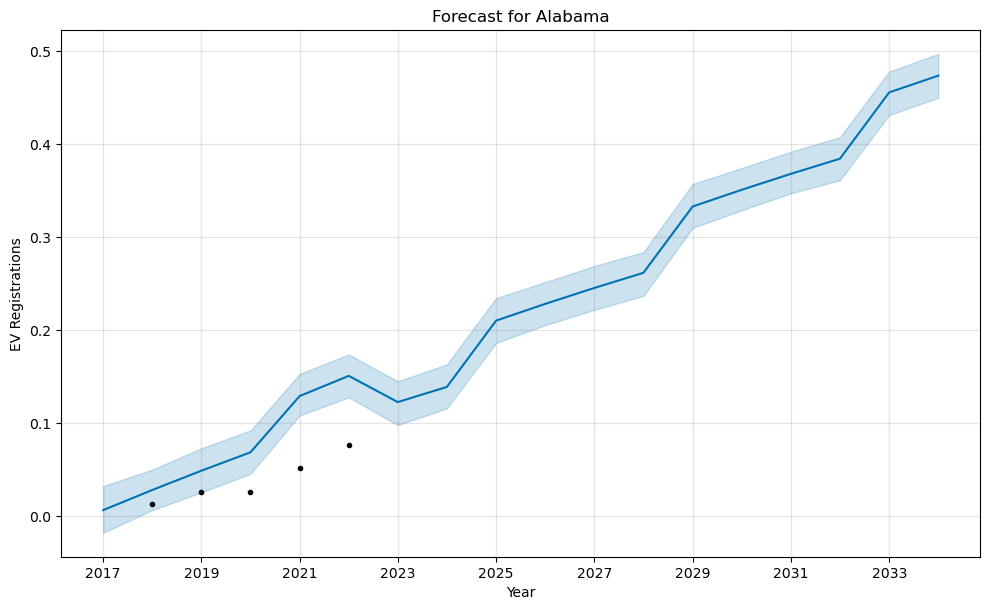

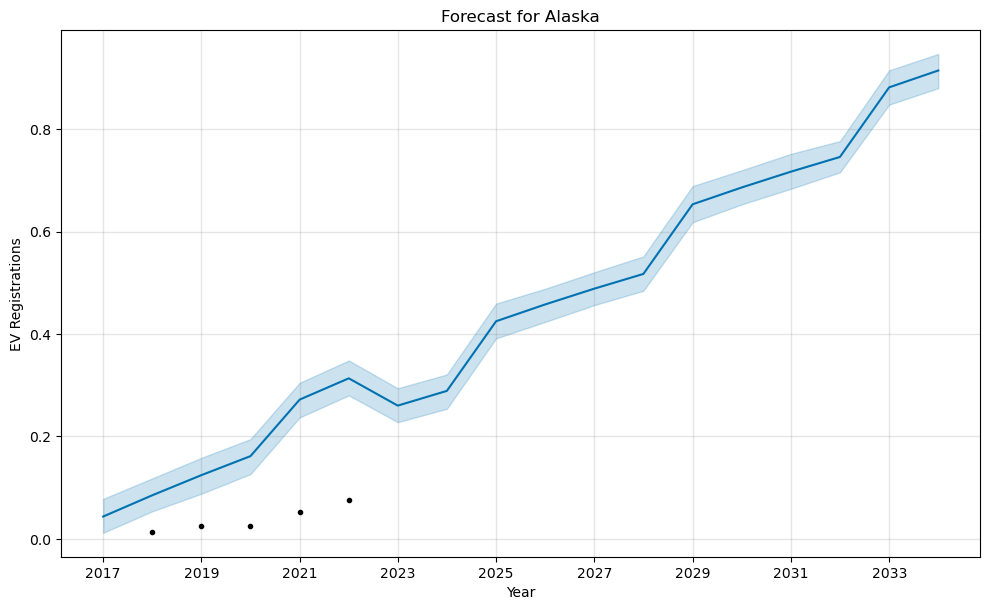

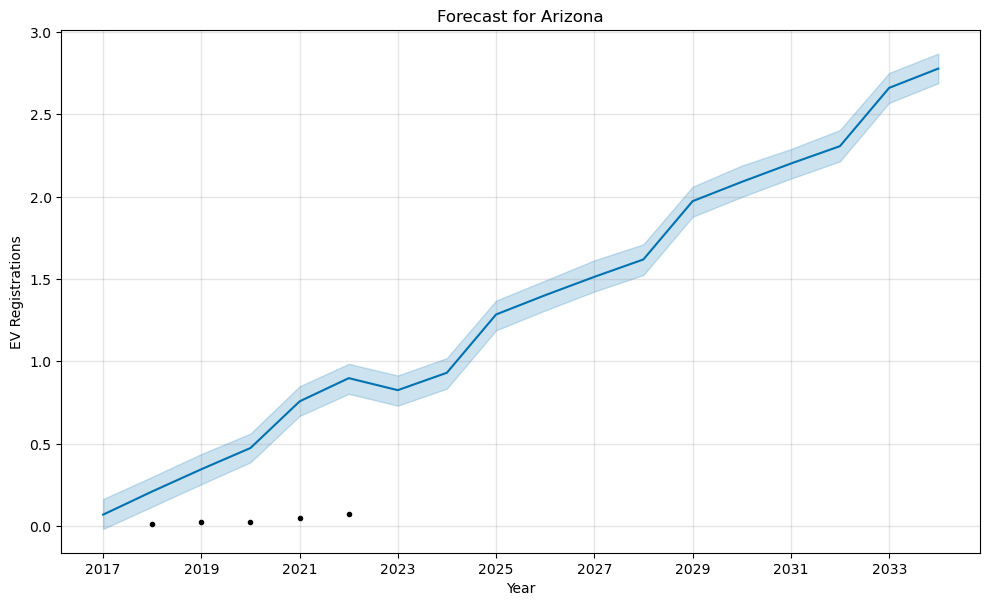

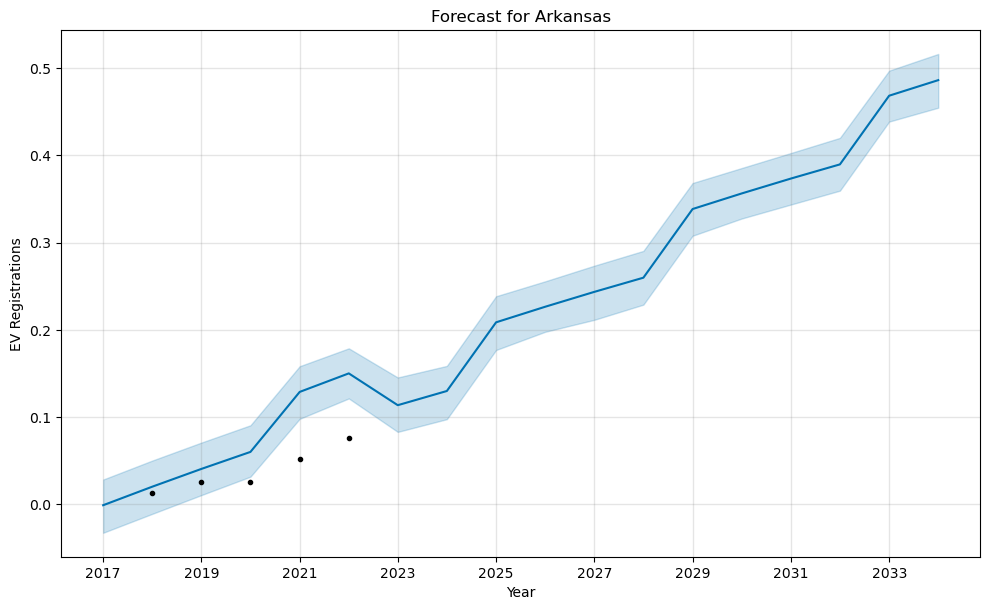

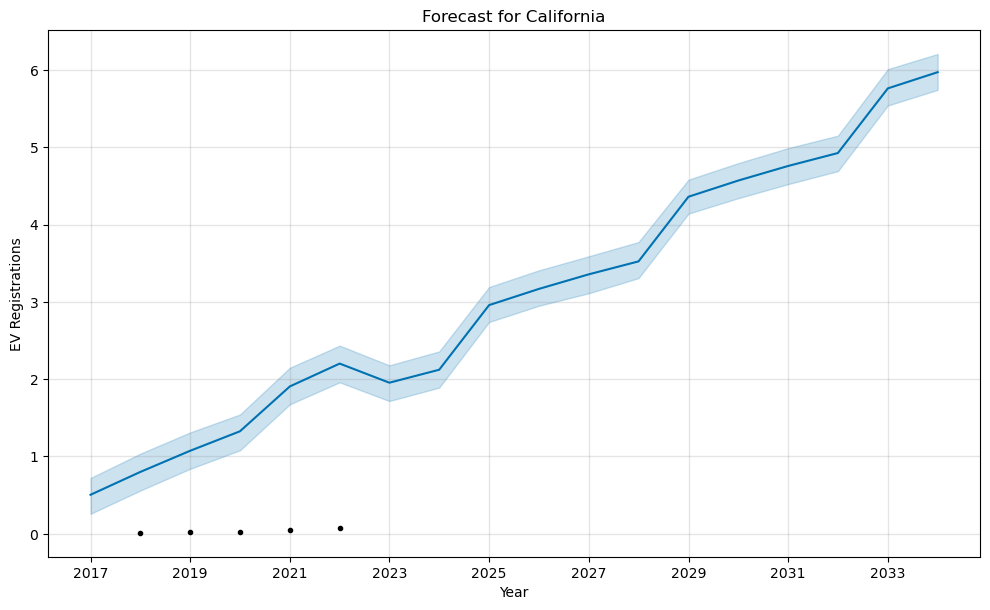

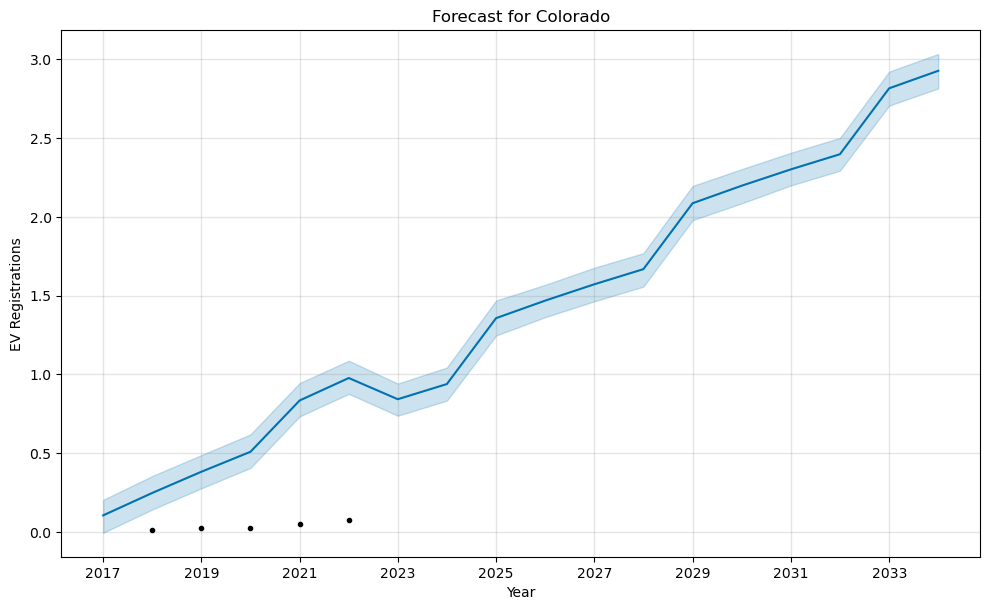

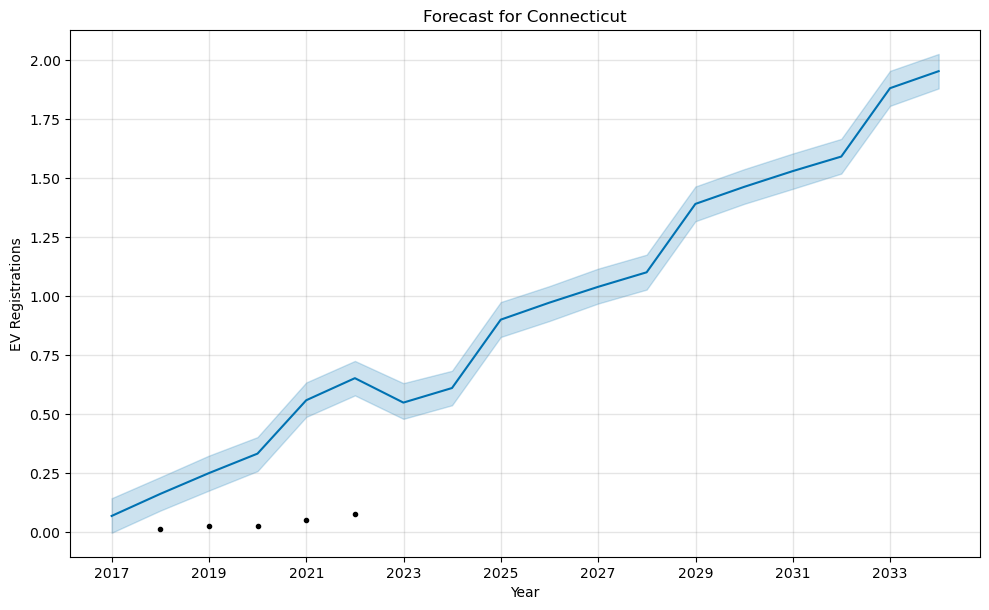

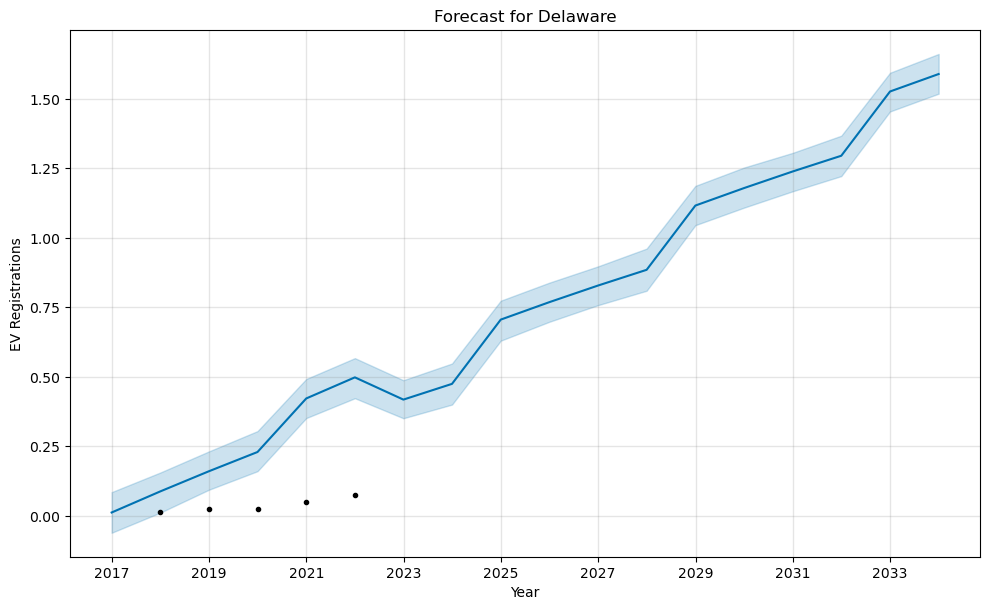

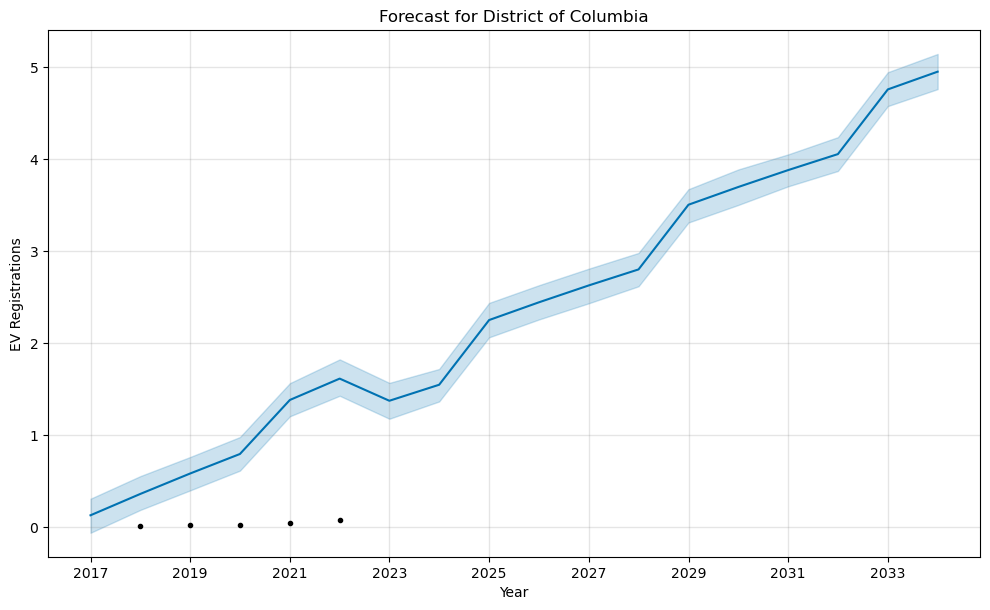

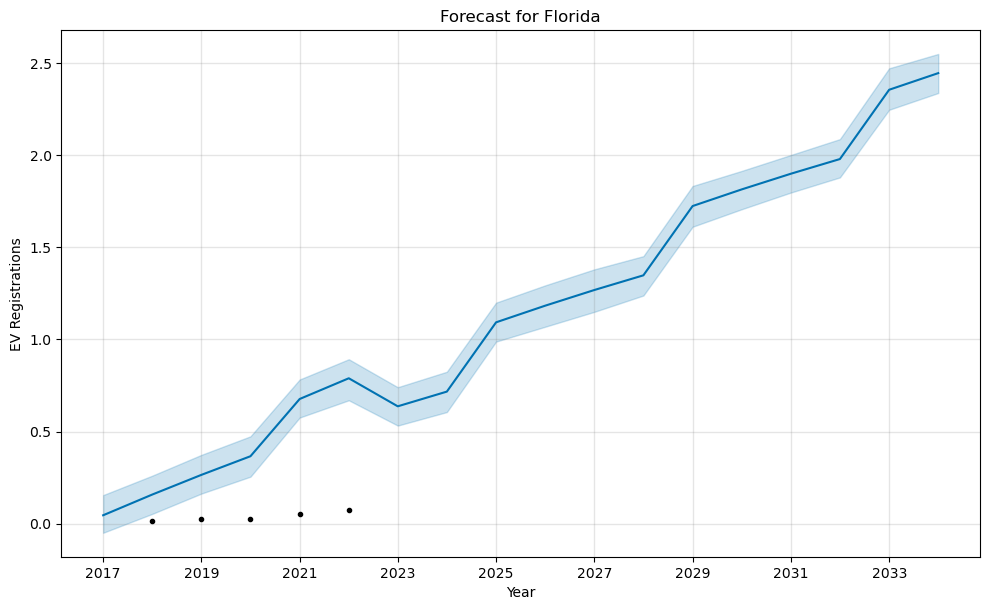

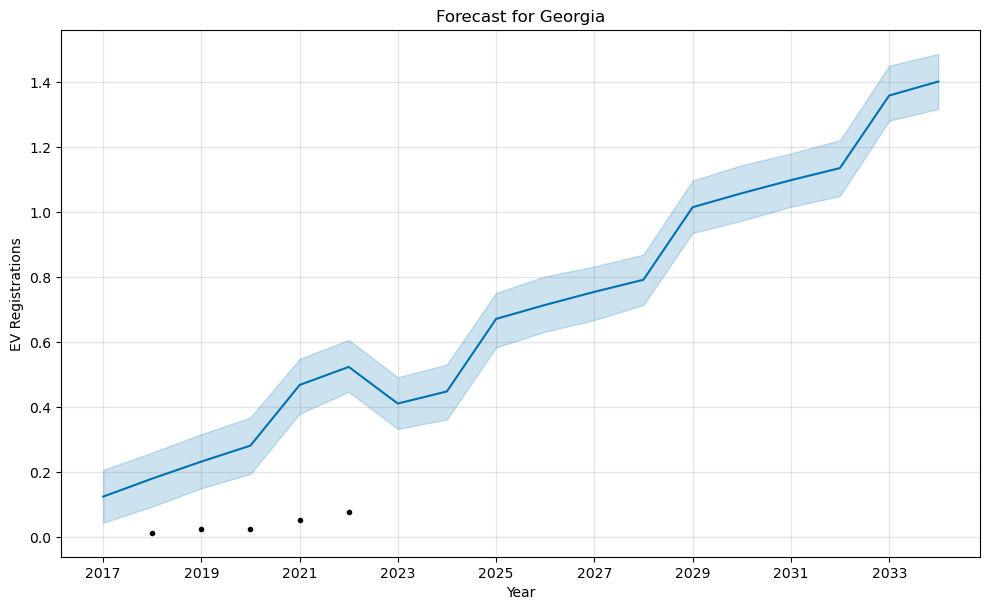

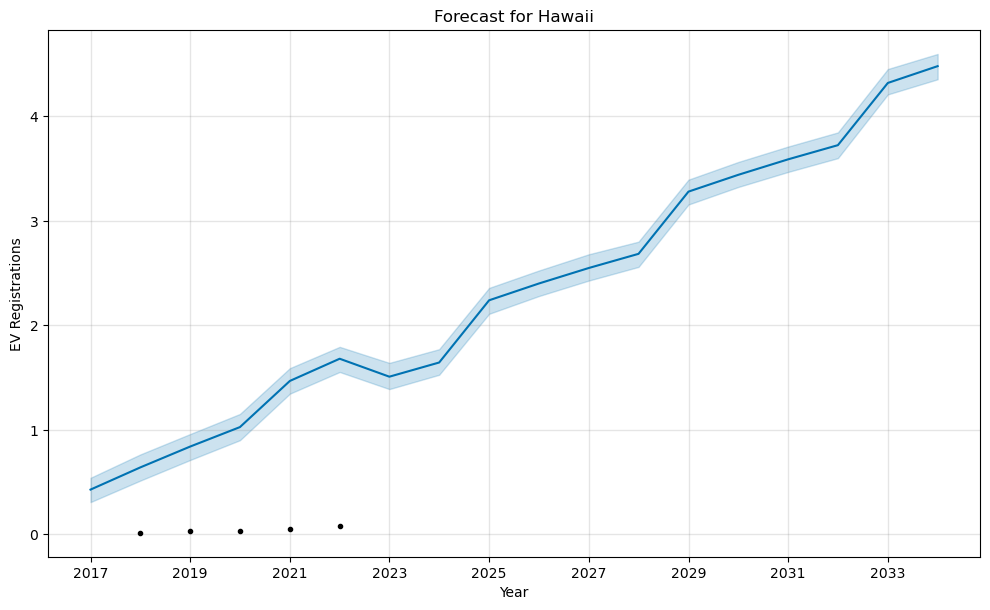

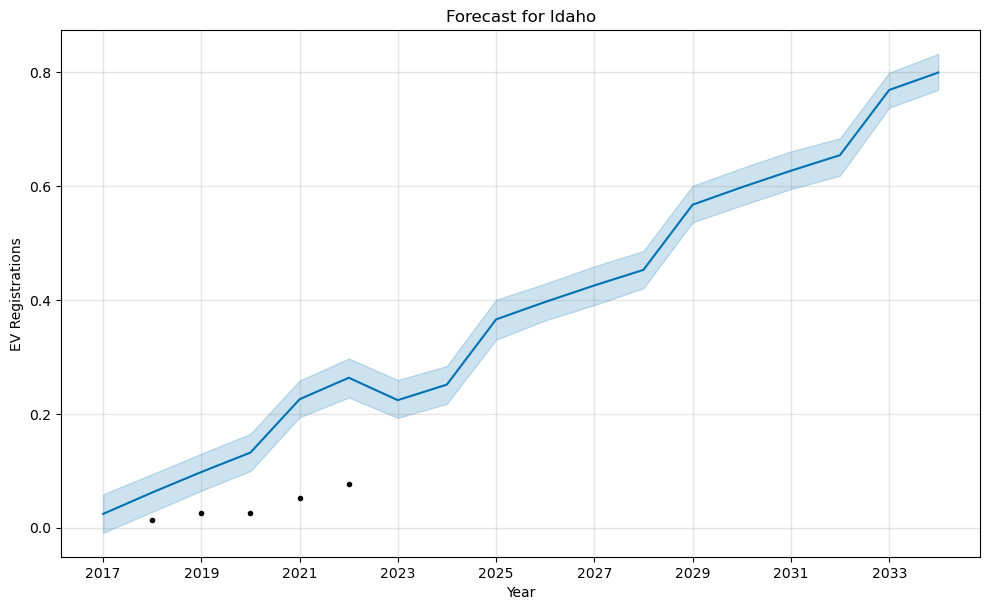

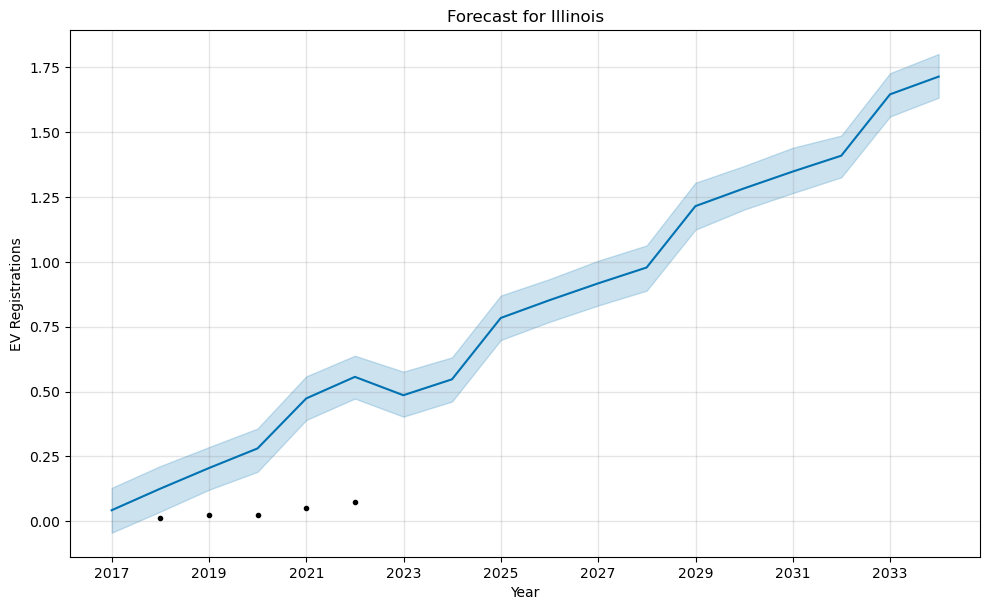

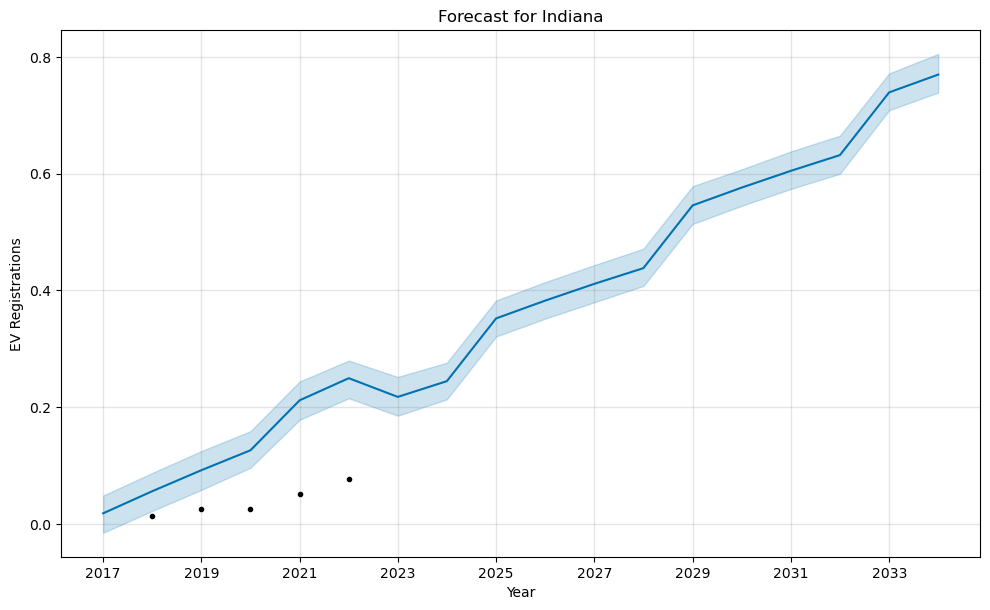

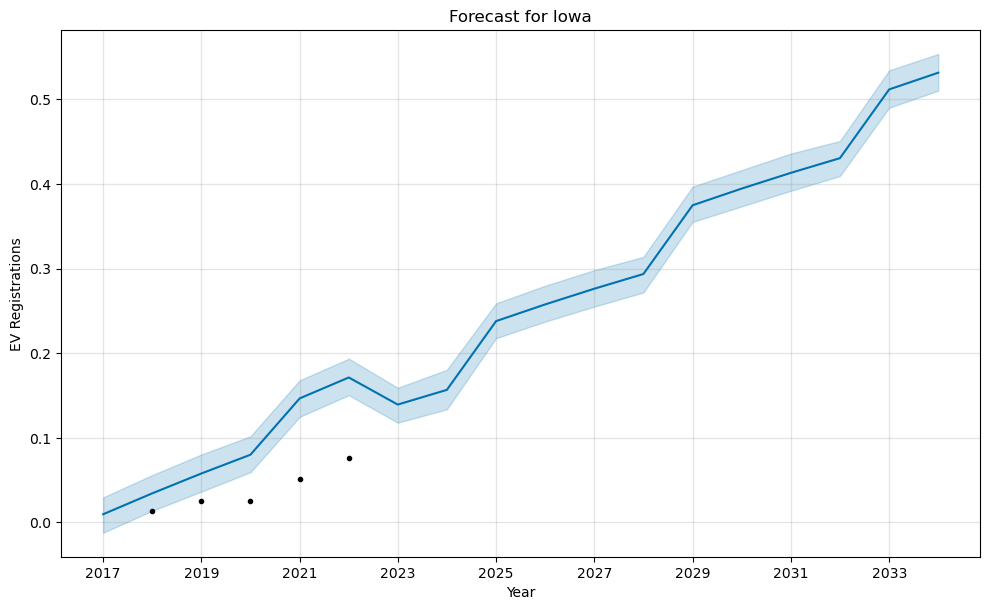

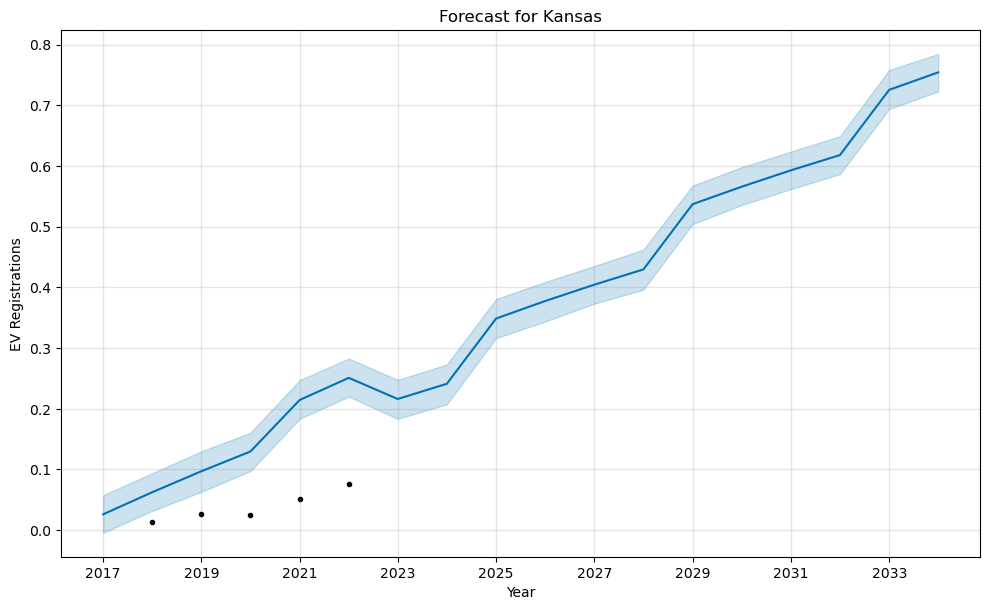

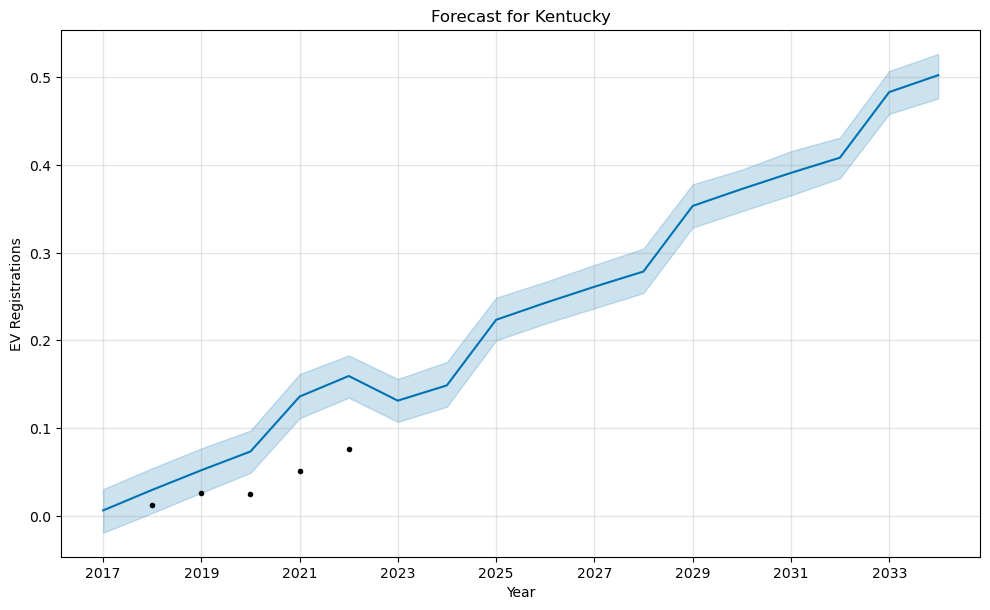

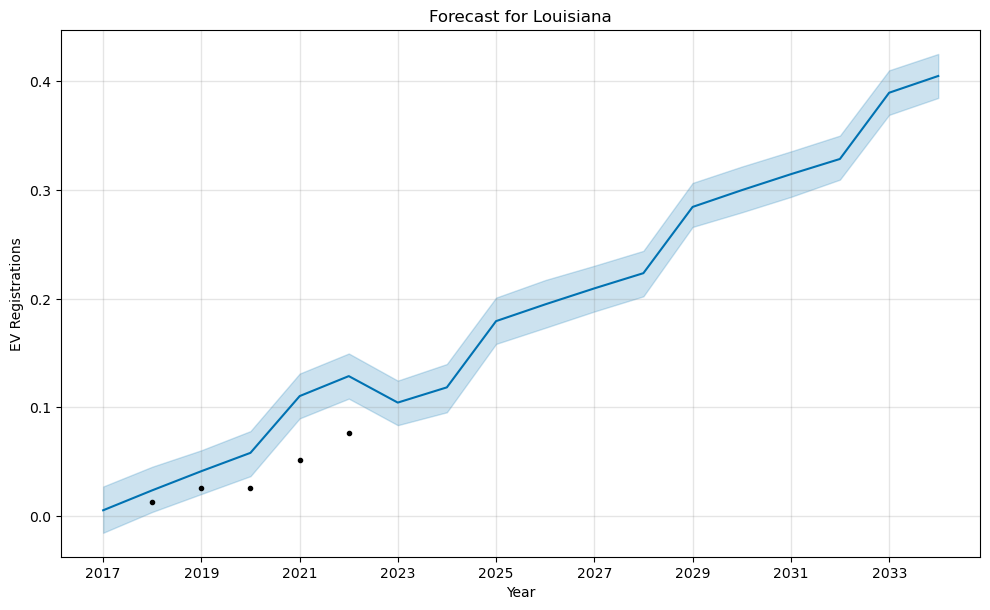

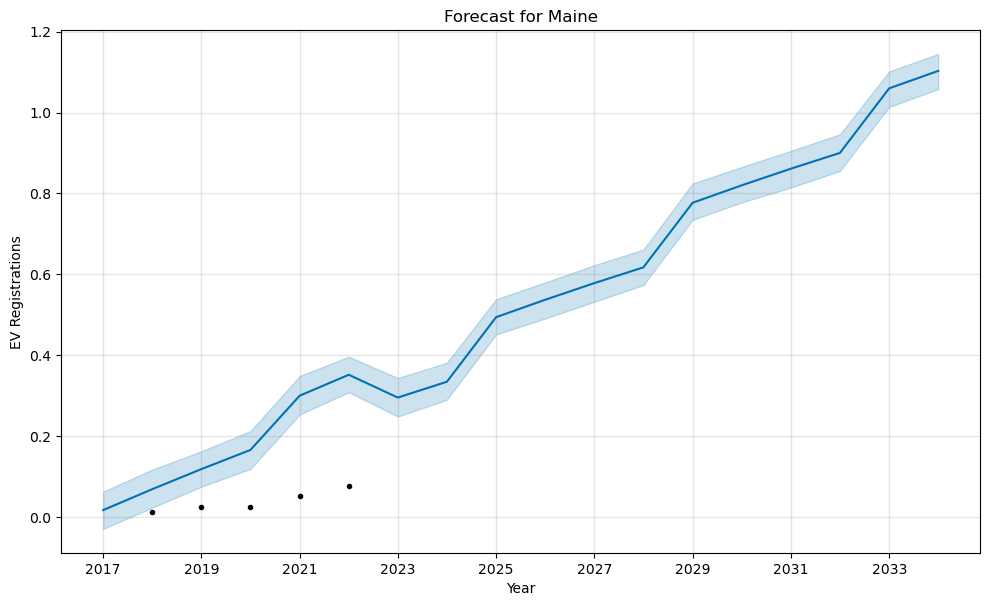

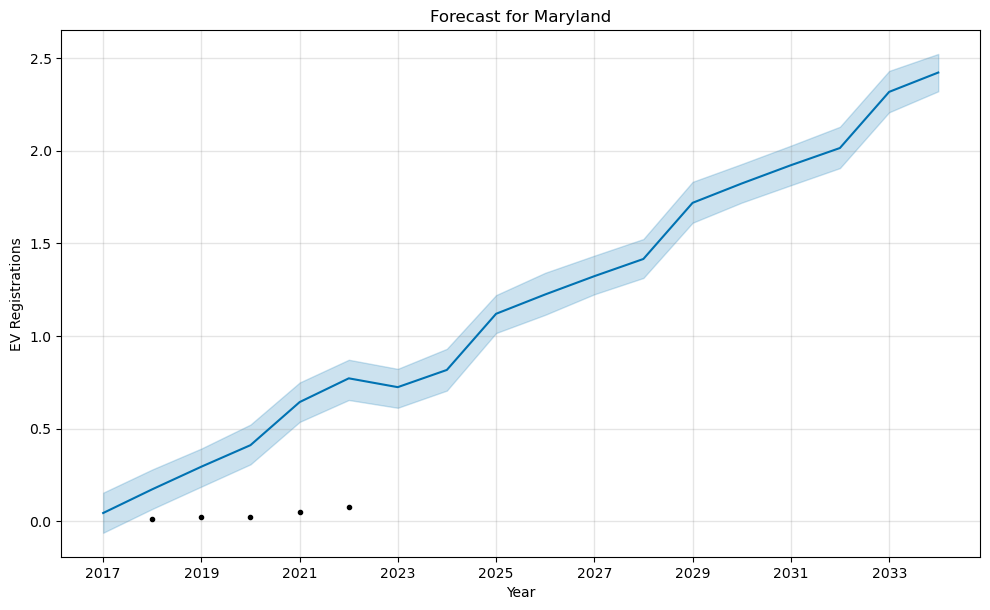

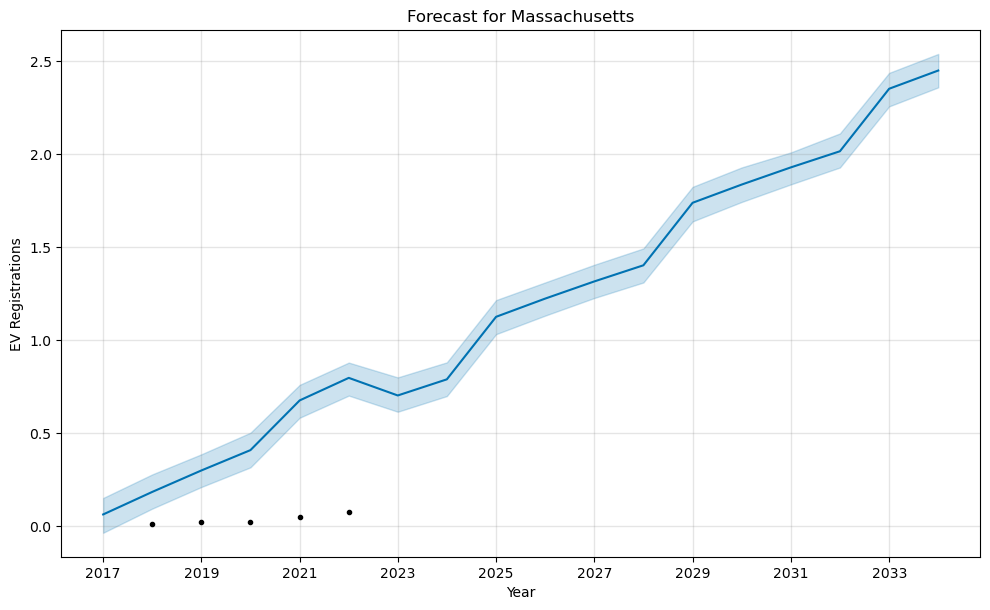

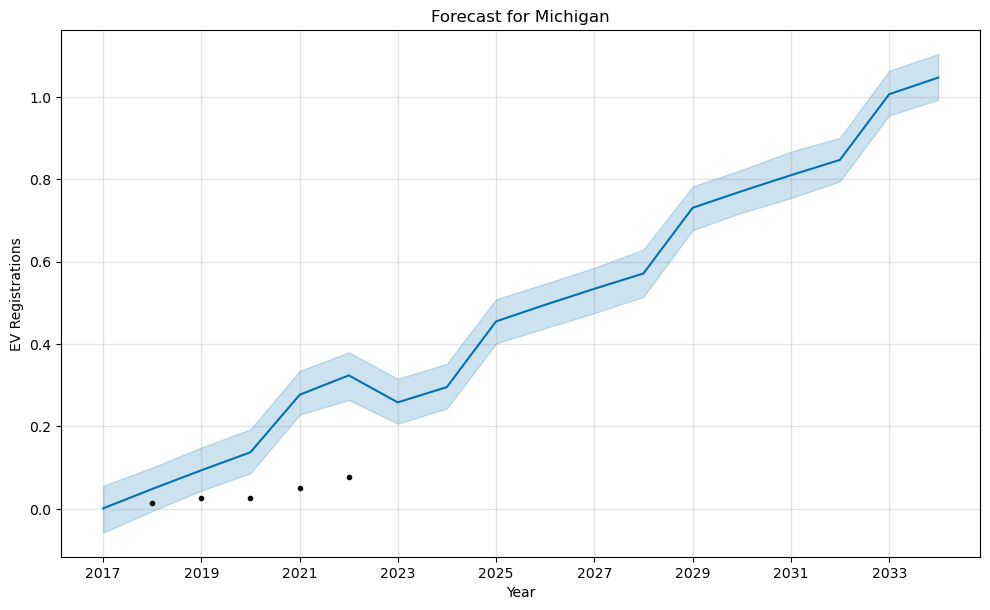

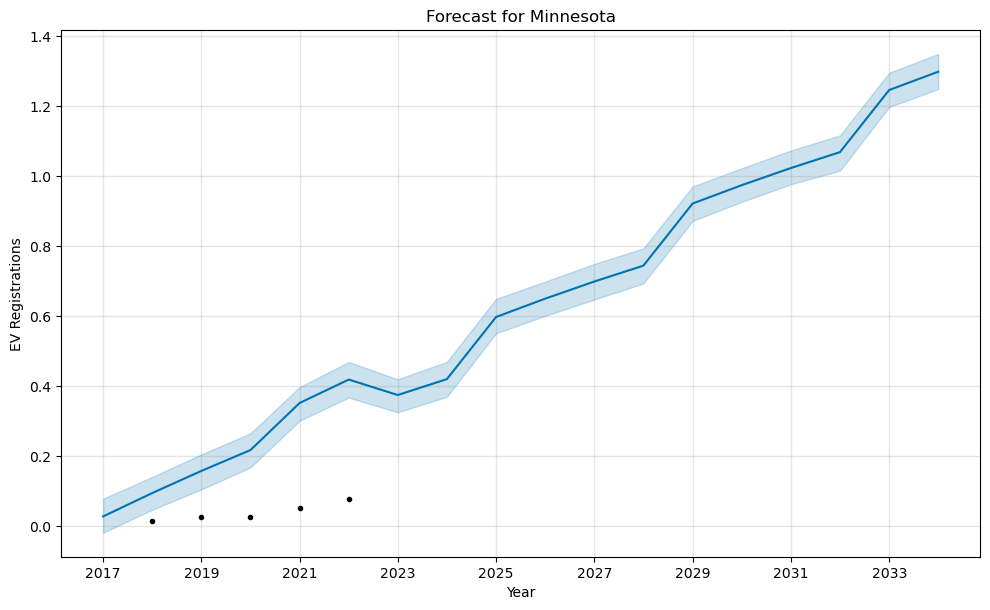

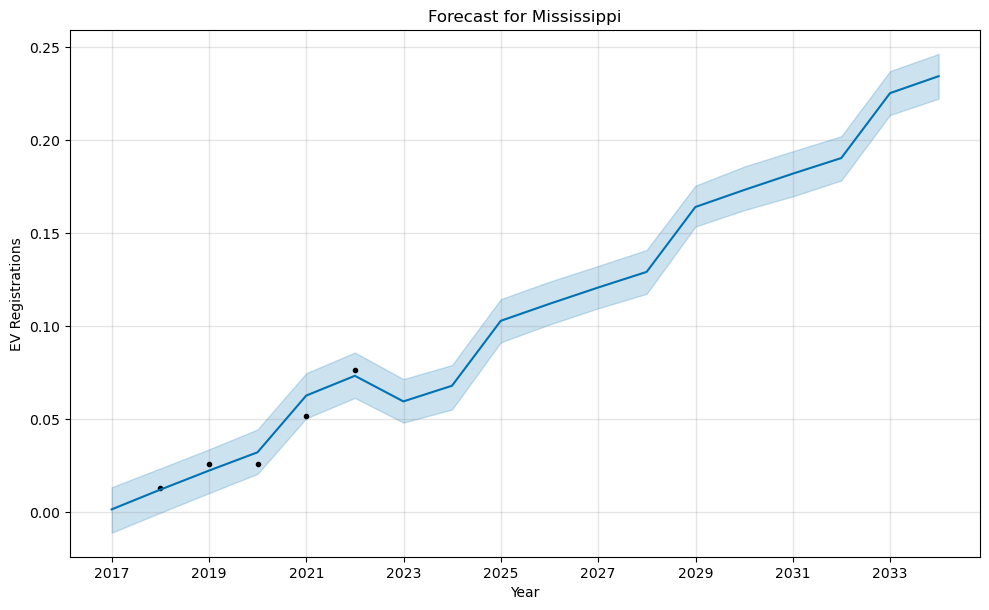

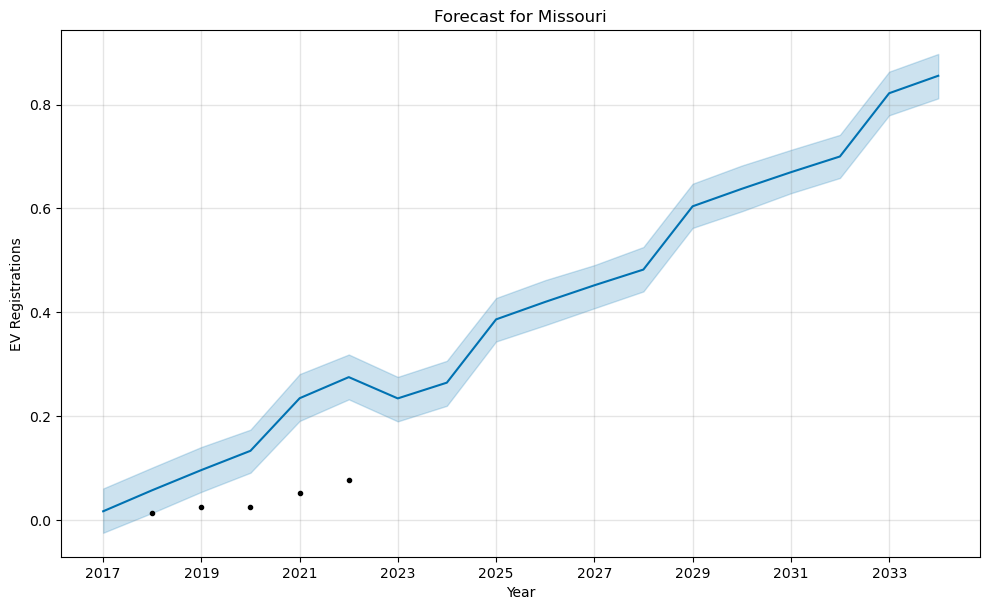

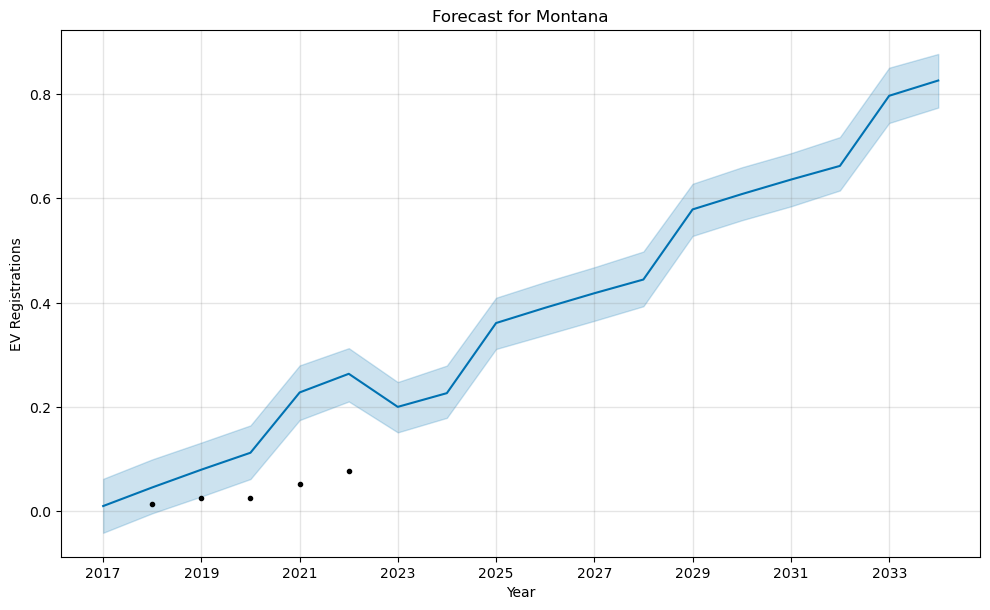

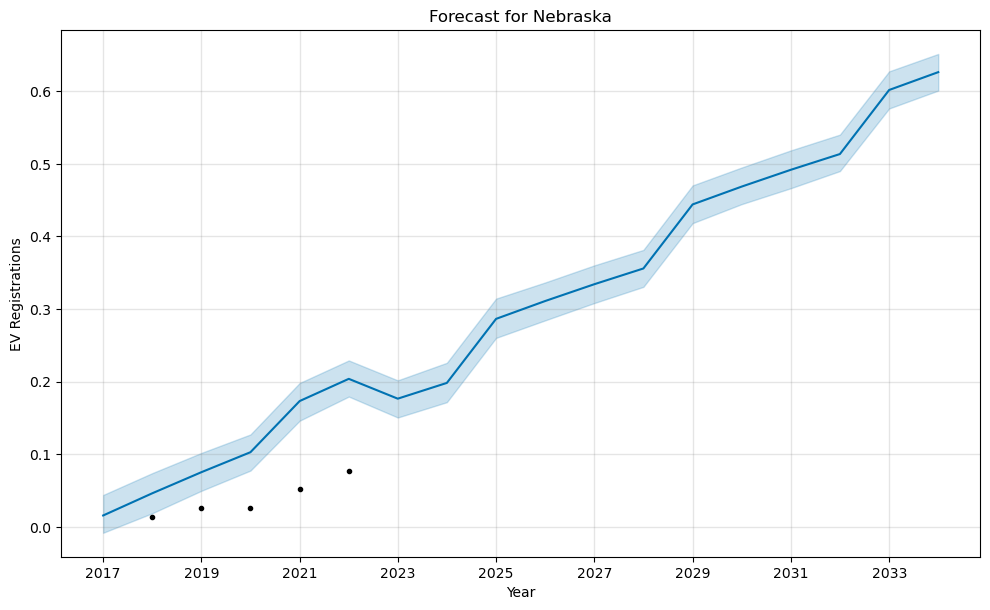

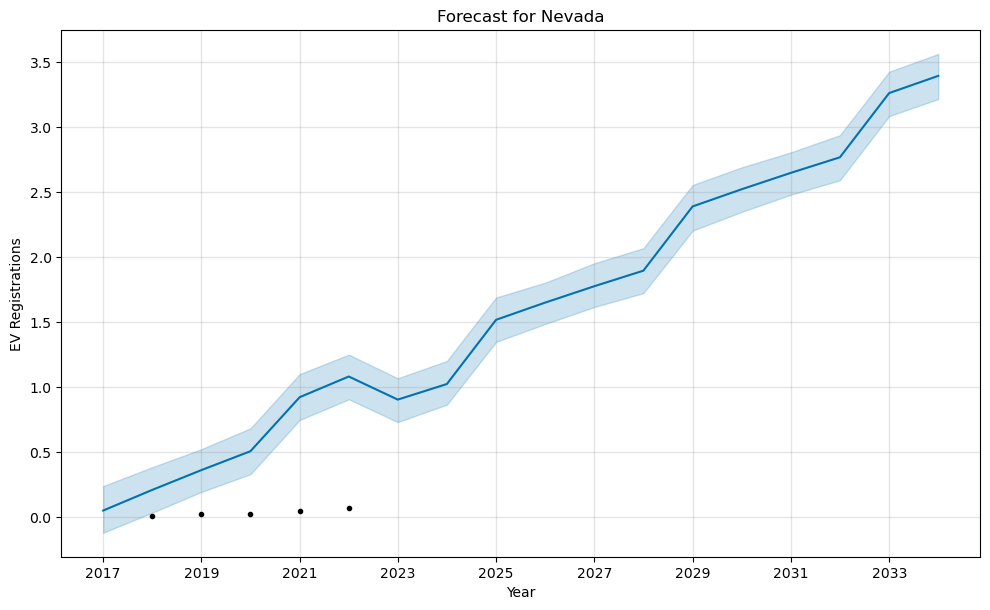

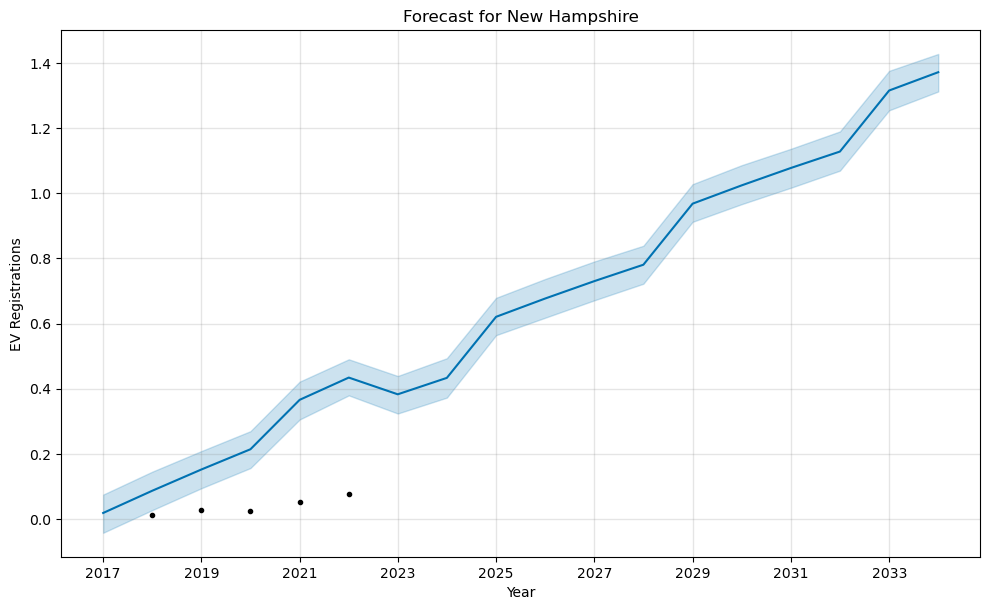

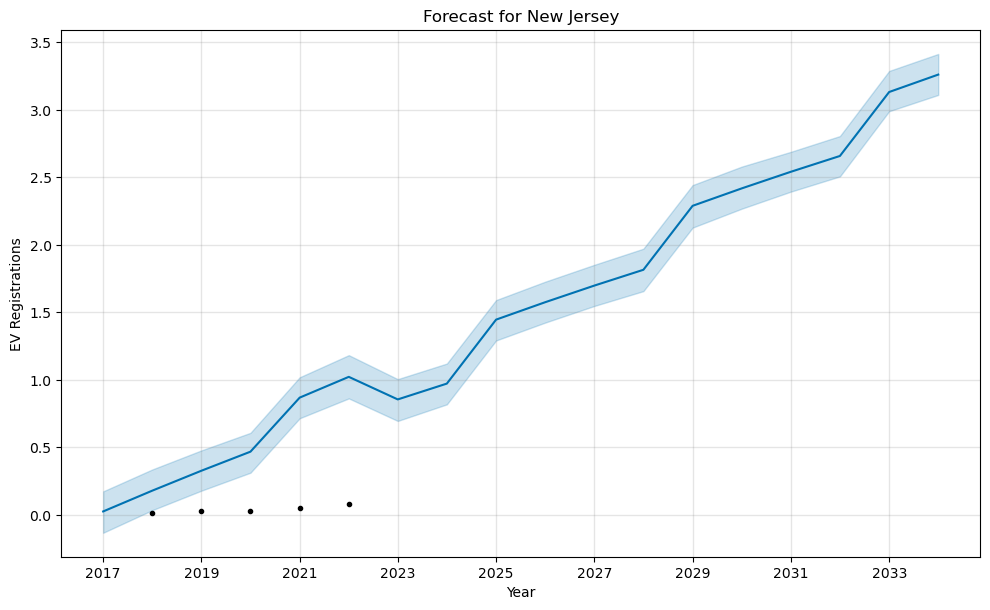

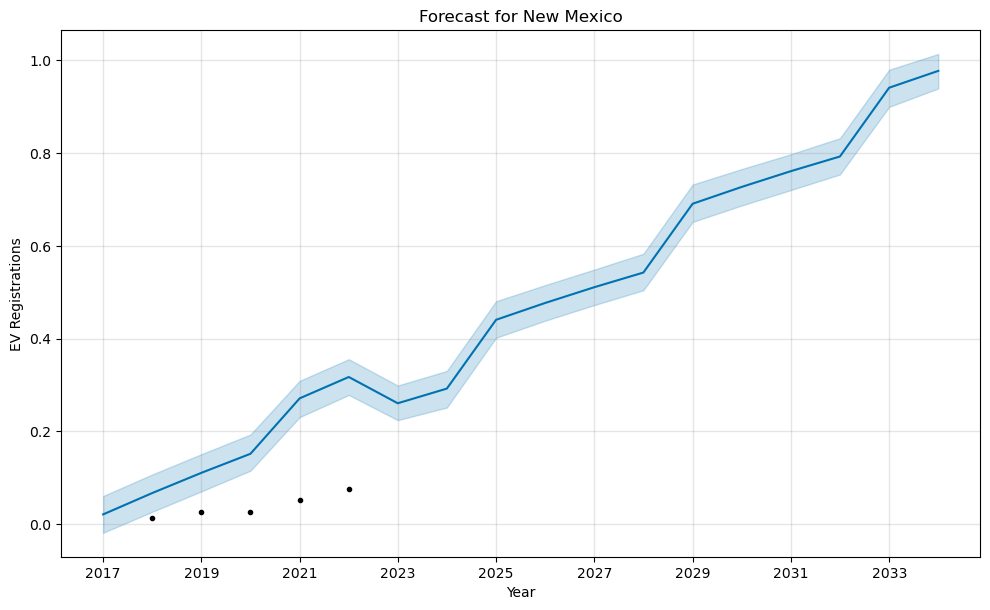

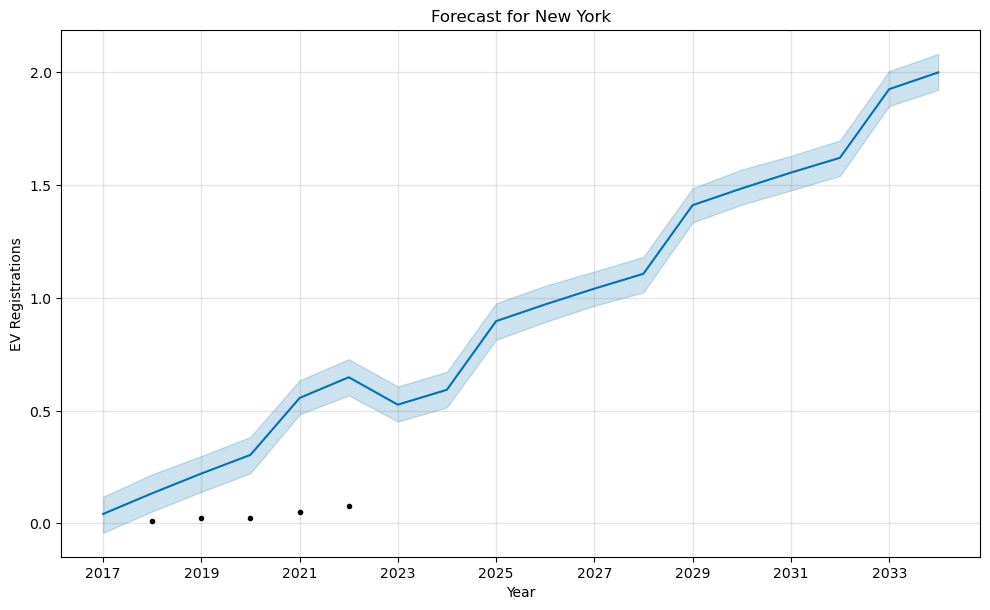

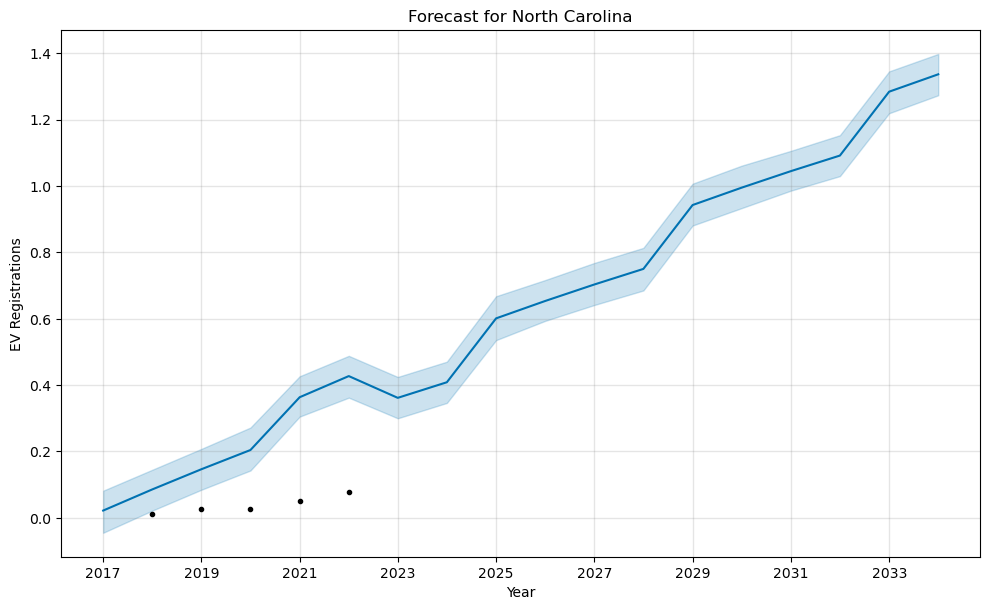

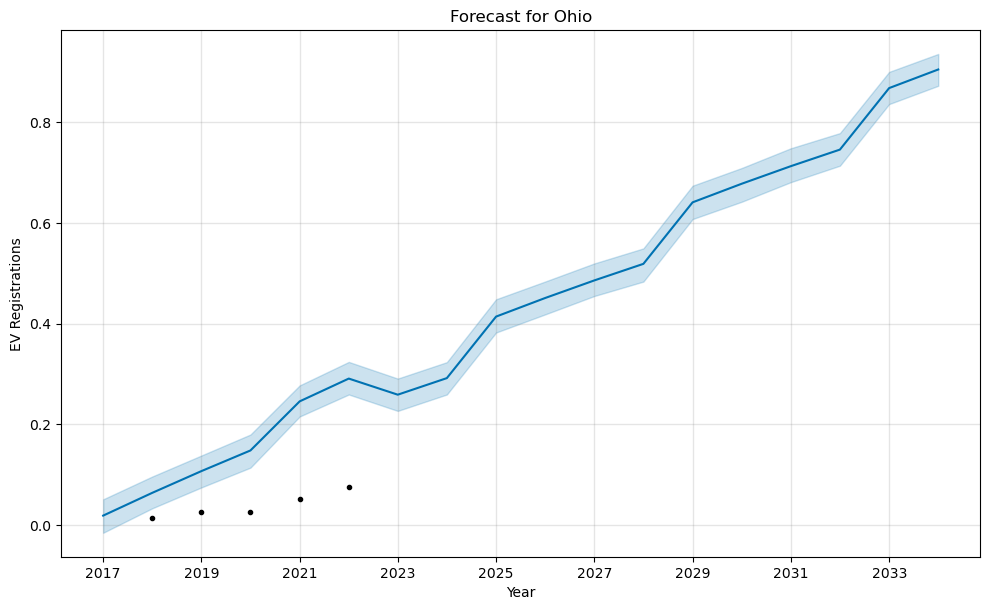

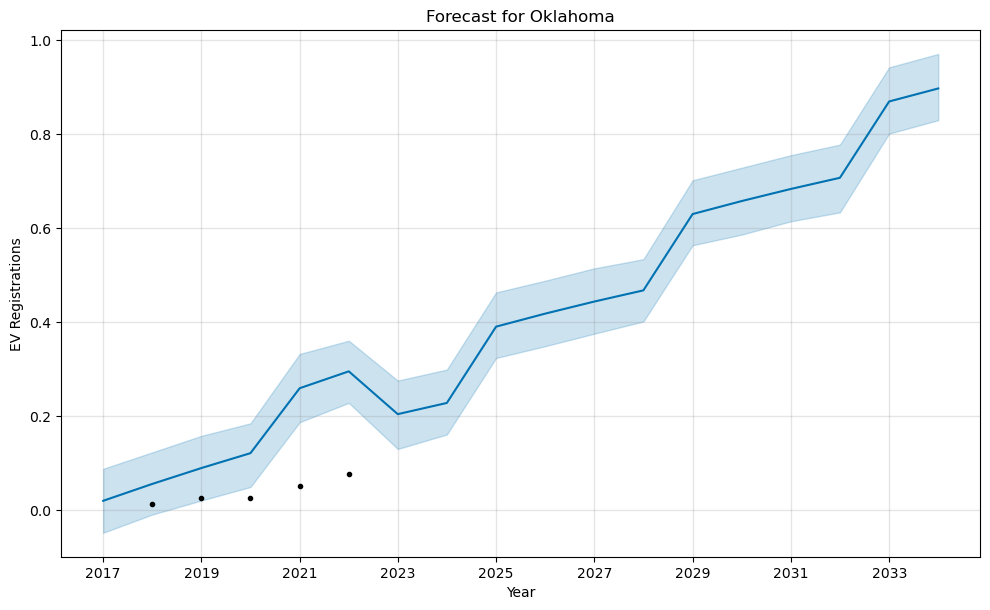

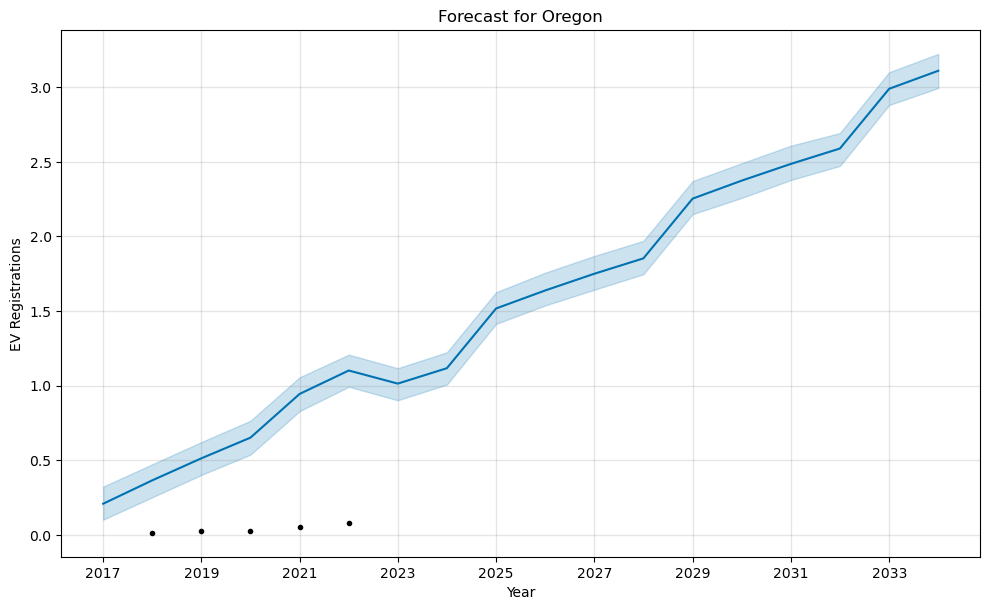

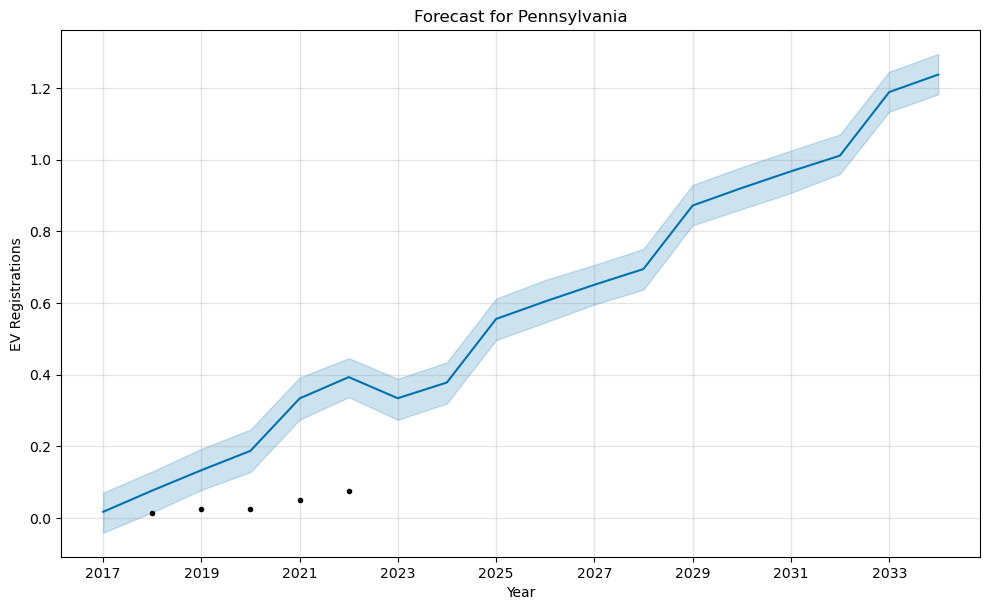

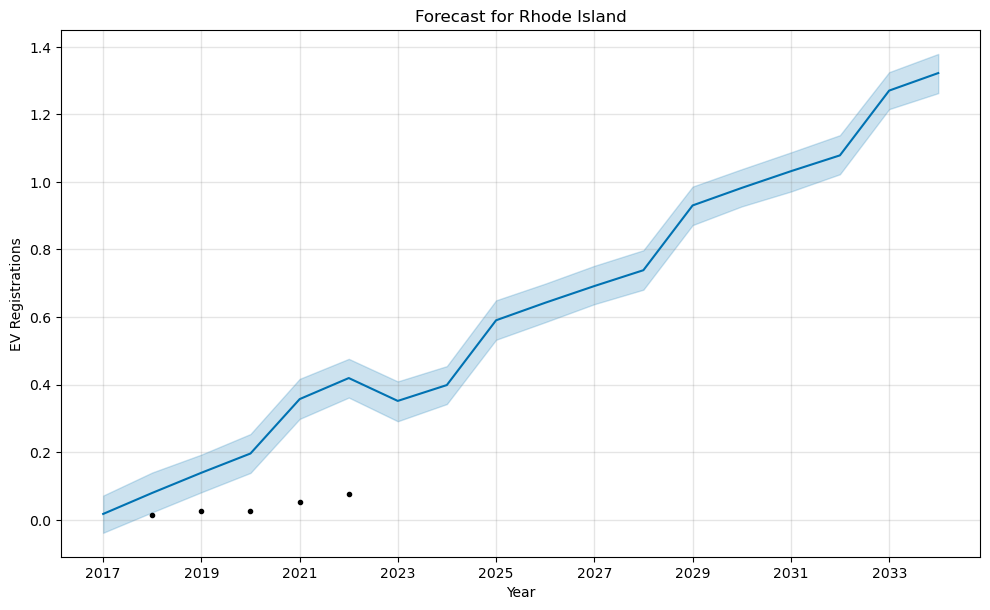

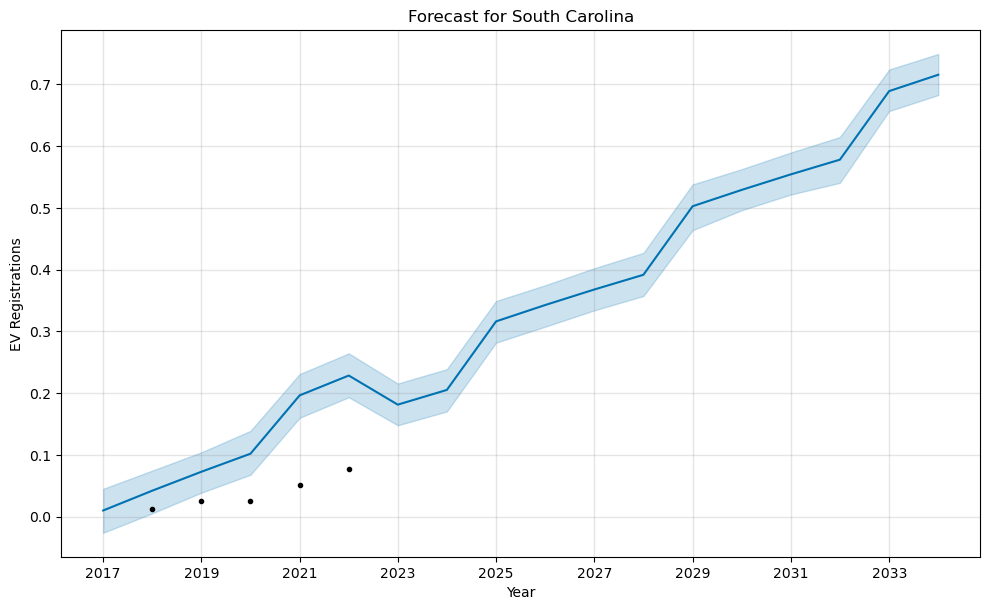

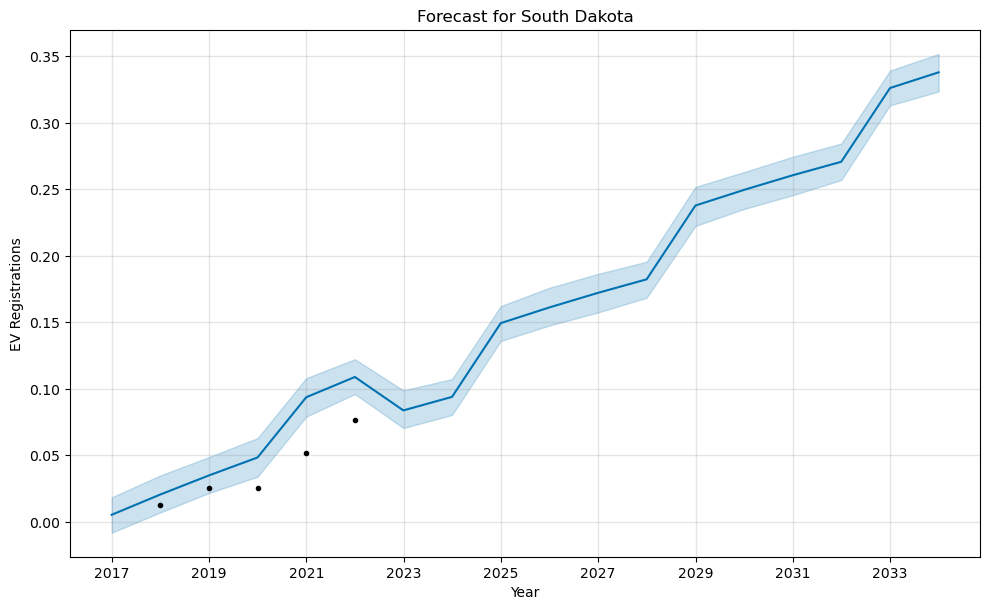

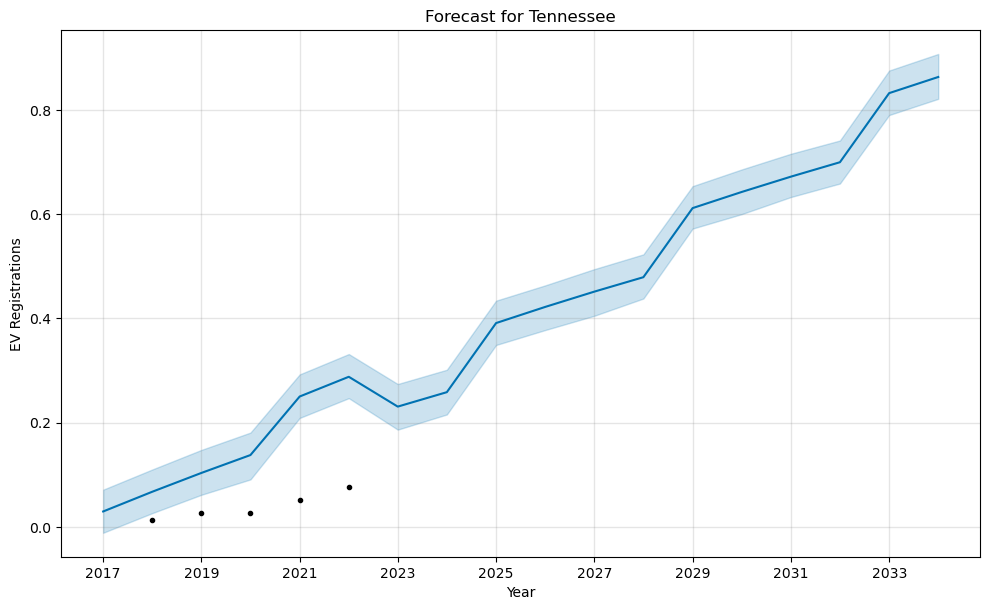

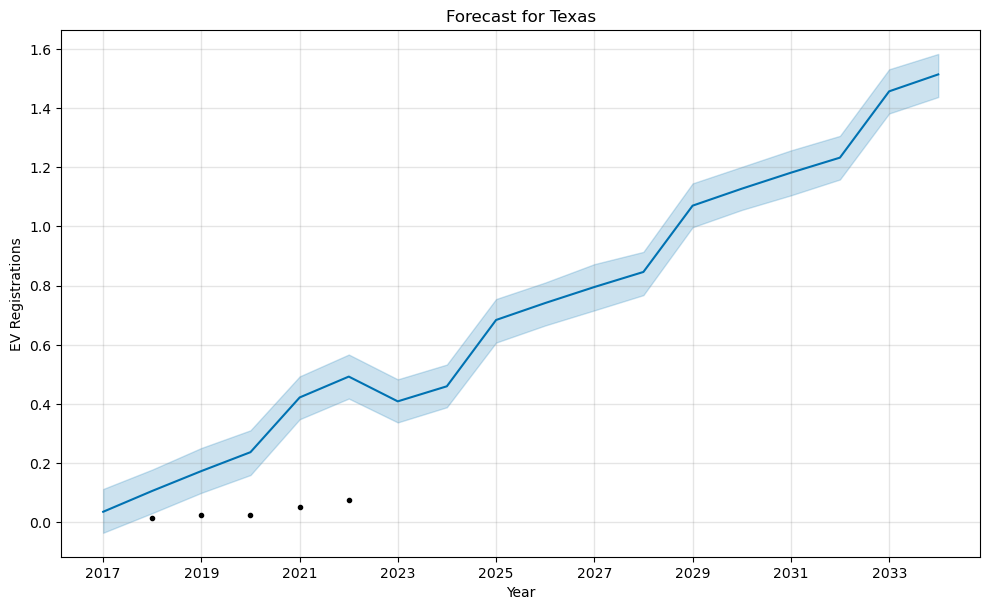

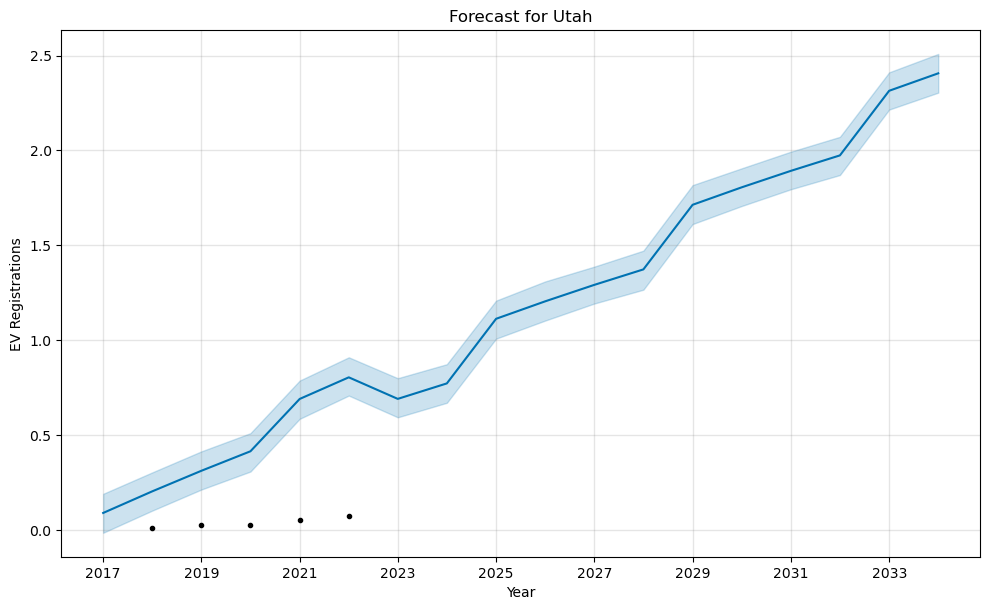

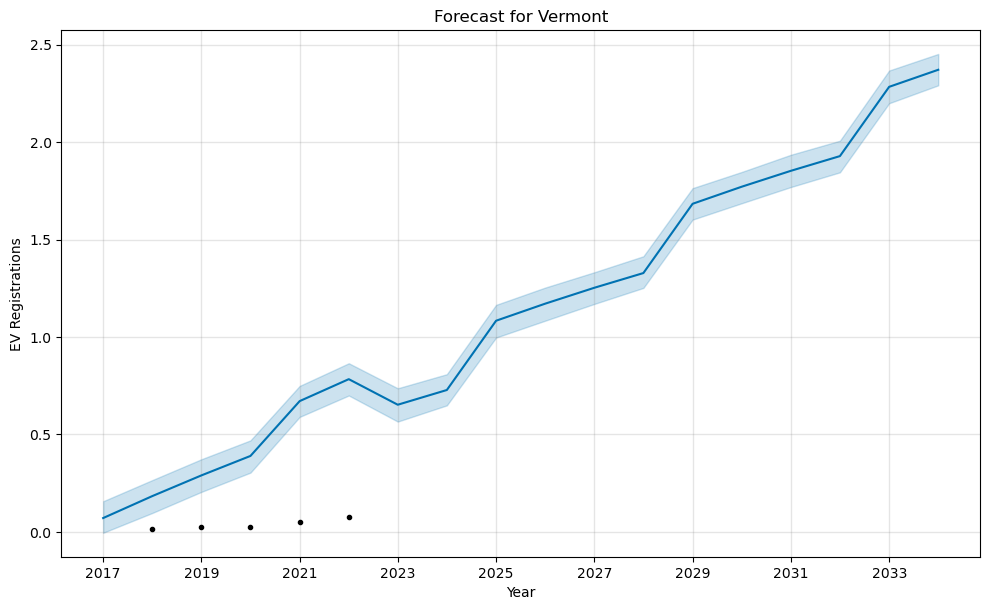

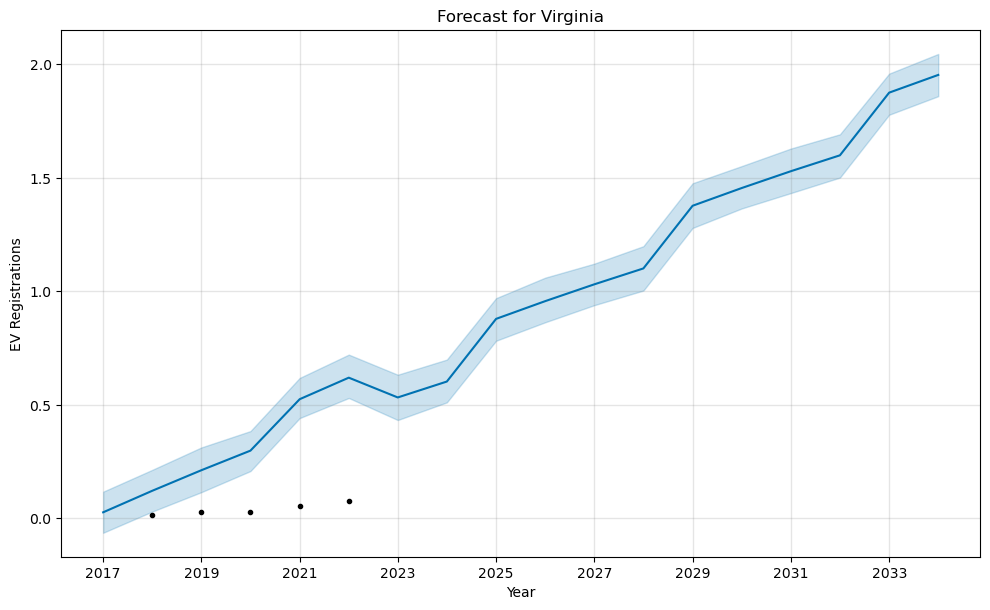

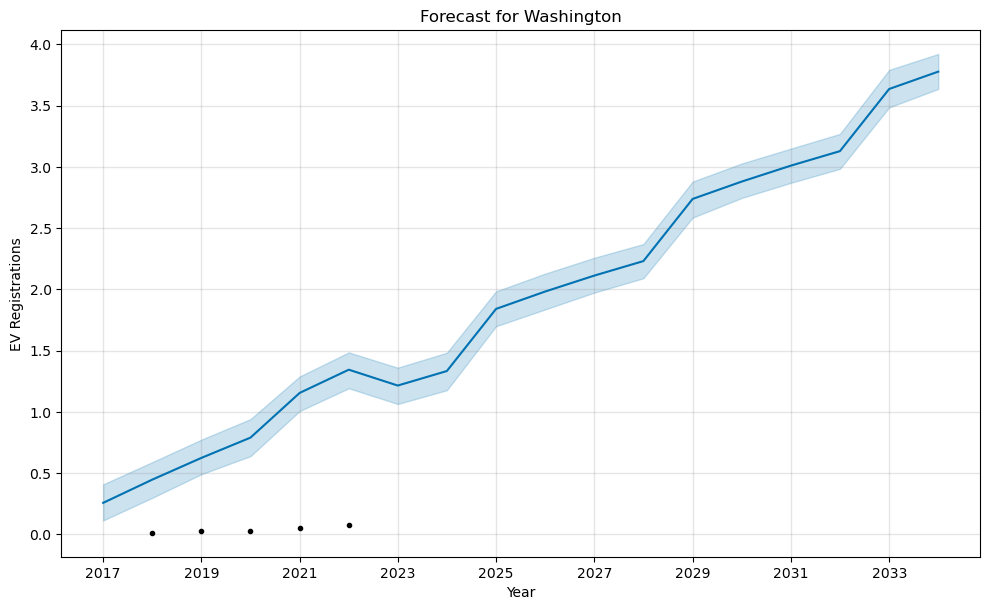

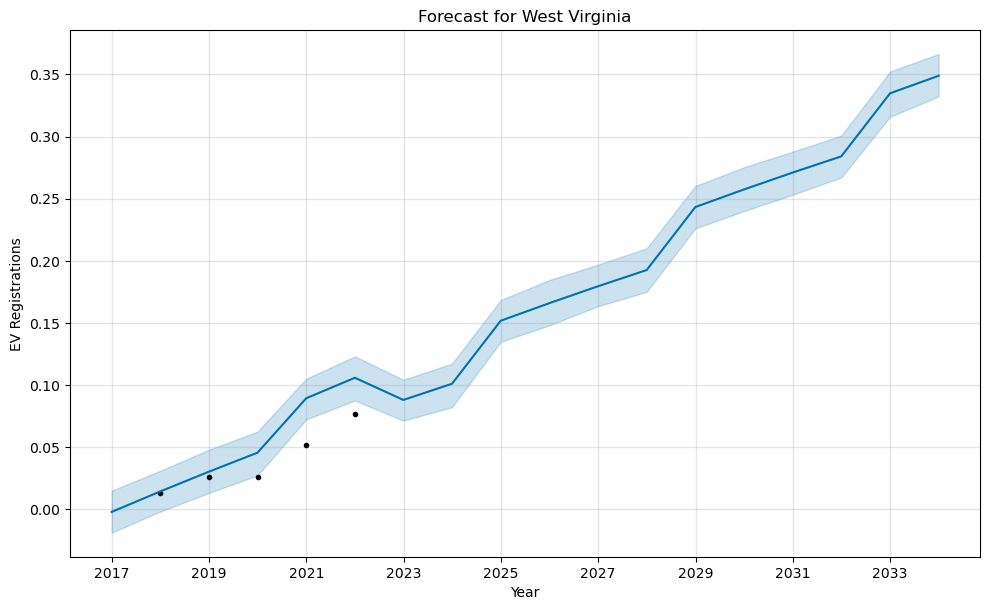

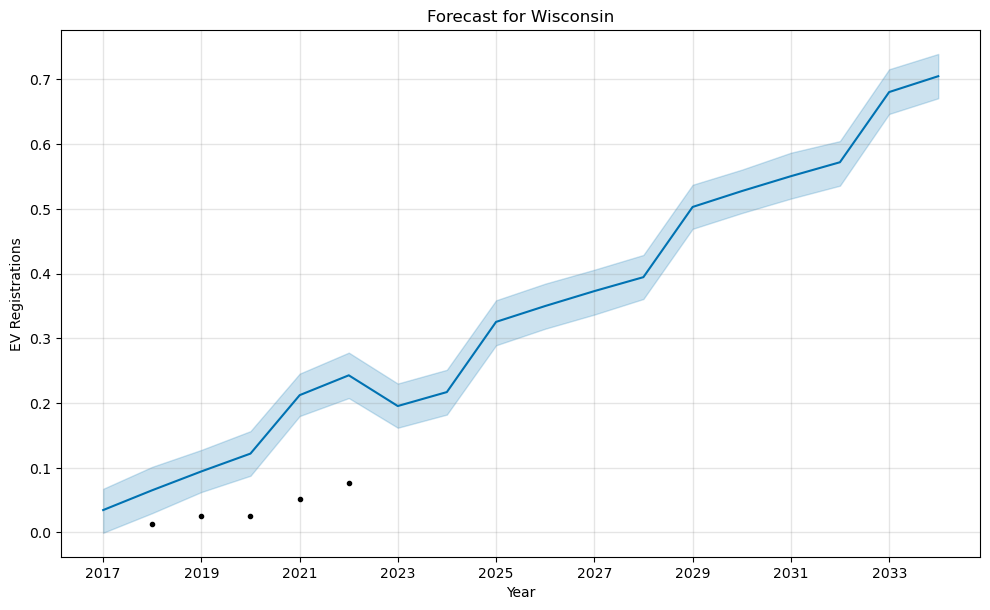

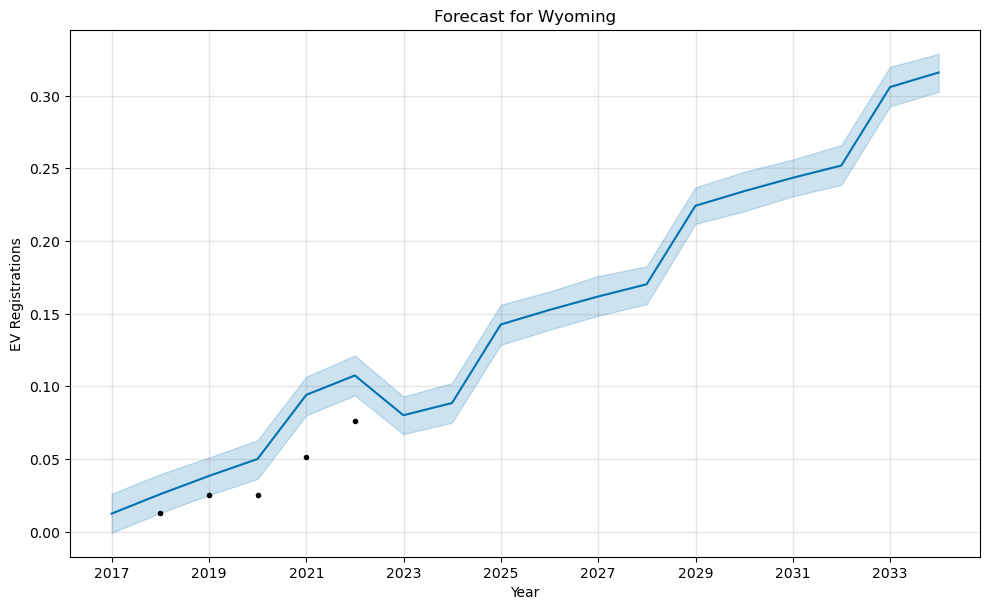

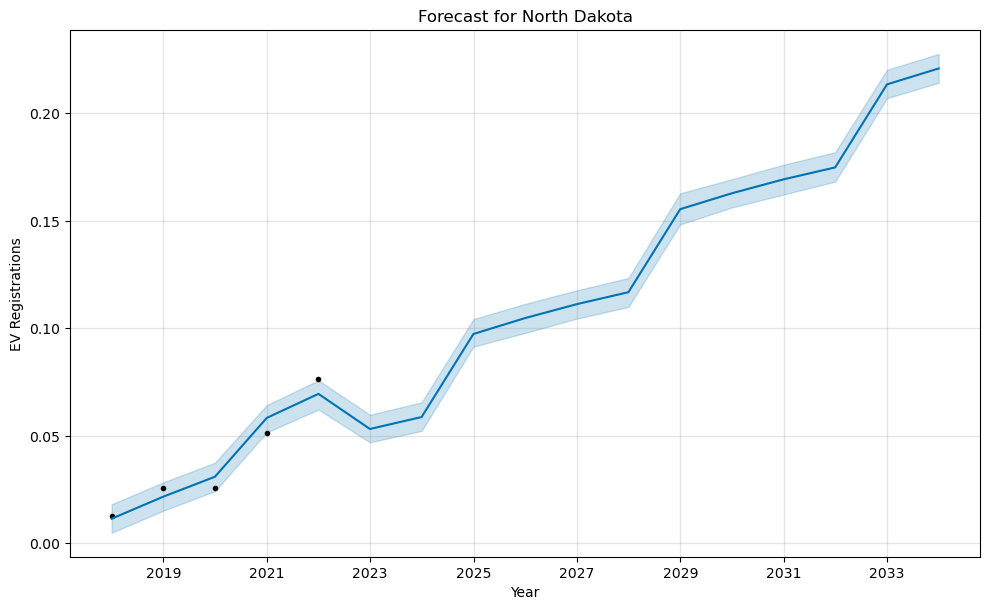

In [18]:
# Plot the forecast for each state

for index, forecast in enumerate(forecast_list):

    fig = model.plot(forecast)
    
    # Customize the plot
    plt.title(f"Forecast for {states_list[index]}")
    plt.xlabel("Year")
    plt.ylabel("EV Registrations")
    
    plt.show()
    